# Confidence contours

In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from scipy.stats import chi2

confidence_level = 0.683 #1 sigma contour
#confidence_level = 0.954 #2 sigma contour
#confidence_level = 0.997 #3 sigma contour

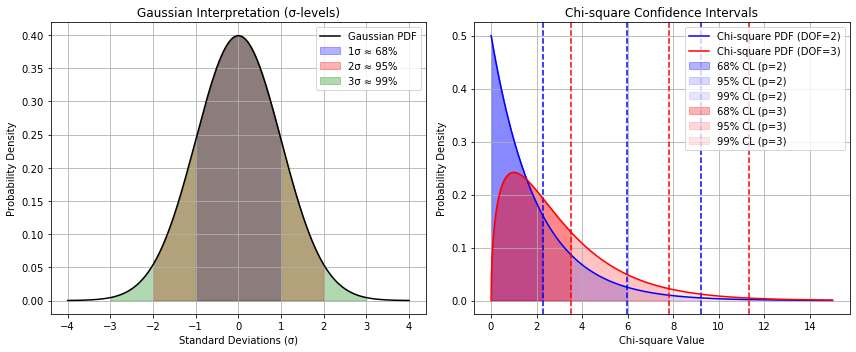

In [4]:
# Gaussian x-axis (standard normal)
x_gauss = np.linspace(-4, 4, 1000)
y_gauss = stats.norm.pdf(x_gauss, 0, 1)

# Chi-square x-axis
x_chi = np.linspace(0, 15, 1000)

# Define p = 2 and p = 3 degrees of freedom
dof_values = [2, 3]
colors = ["blue", "red"]

# Compute chi-square confidence thresholds
confidence_levels = [0.68, 0.95, 0.99]
thresholds = {p: [stats.chi2.ppf(cl, p) for cl in confidence_levels] for p in dof_values}

# Create figure
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# --- Left Plot: Gaussian Distribution (σ-intervals) ---
axes[0].plot(x_gauss, y_gauss, label="Gaussian PDF", color="black")
axes[0].fill_between(x_gauss, y_gauss, where=(np.abs(x_gauss) <= 1), color='blue', alpha=0.3, label="1σ ≈ 68%")
axes[0].fill_between(x_gauss, y_gauss, where=(np.abs(x_gauss) <= 2), color='red', alpha=0.3, label="2σ ≈ 95%")
axes[0].fill_between(x_gauss, y_gauss, where=(np.abs(x_gauss) <= 3), color='green', alpha=0.3, label="3σ ≈ 99%")

axes[0].set_title("Gaussian Interpretation (σ-levels)")
axes[0].set_xlabel("Standard Deviations (σ)")
axes[0].set_ylabel("Probability Density")
axes[0].legend()
axes[0].grid()

# --- Right Plot: Chi-square Confidence Levels ---
for i, p in enumerate(dof_values):
    y_chi = stats.chi2.pdf(x_chi, p)
    axes[1].plot(x_chi, y_chi, label=f"Chi-square PDF (DOF={p})", color=colors[i])
    
    # Shade confidence levels
    for j, cl in enumerate(confidence_levels):
        axes[1].fill_between(x_chi, y_chi, where=(x_chi <= thresholds[p][j]), color=colors[i], alpha=0.3/(j+1), label=f"{int(cl*100)}% CL (p={p})")
    
    # Vertical lines for chi-square thresholds
    for t in thresholds[p]:
        axes[1].axvline(t, color=colors[i], linestyle="dashed")

axes[1].set_title("Chi-square Confidence Intervals")
axes[1].set_xlabel("Chi-square Value")
axes[1].set_ylabel("Probability Density")
axes[1].legend()
axes[1].grid()

# Show plot
plt.tight_layout()
plt.show()


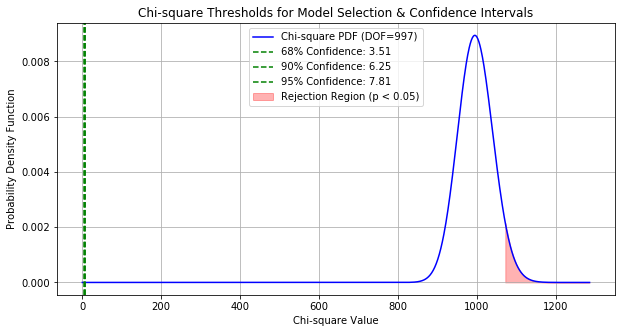

In [3]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Define parameters
N = 1000  # Number of data points
p = 3     # Number of free parameters

# Degrees of freedom
dof_fit = N - p
dof_wilks = p

# Compute thresholds
alpha_fit = 0.05  # 95% confidence for goodness of fit
chi2_fit_threshold = stats.chi2.ppf(1 - alpha_fit, dof_fit)

alpha_wilks = {"68%": 1 - 0.68, "90%": 1 - 0.90, "95%": 1 - 0.95}
chi2_wilks_thresholds = {key: stats.chi2.ppf(1 - val, dof_wilks) for key, val in alpha_wilks.items()}

# Generate chi-square distribution
x_fit = np.linspace(0, chi2_fit_threshold * 1.2, 1000)
y_fit = stats.chi2.pdf(x_fit, dof_fit)

x_wilks = np.linspace(0, max(chi2_wilks_thresholds.values()) * 1.2, 1000)
y_wilks = stats.chi2.pdf(x_wilks, dof_wilks)

# Plot goodness-of-fit chi-square distribution
plt.figure(figsize=(10, 5))
plt.plot(x_fit, y_fit, label=f"Chi-square PDF (DOF={dof_fit})", color='blue')

# Shade the rejection region
plt.fill_between(x_fit, y_fit, where=(x_fit >= chi2_fit_threshold), color='red', alpha=0.3, label="Rejection Region (p < 0.05)")

# Plot Wilks' theorem chi-square thresholds
for level, threshold in chi2_wilks_thresholds.items():
    plt.axvline(threshold, color='green', linestyle='--', label=f"{level} Confidence: {threshold:.2f}")

# Labels and legend
plt.xlabel("Chi-square Value")
plt.ylabel("Probability Density Function")
plt.title("Chi-square Thresholds for Model Selection & Confidence Intervals")
plt.legend()
plt.grid()

# Show plot
plt.show()
